In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from numpy import exp

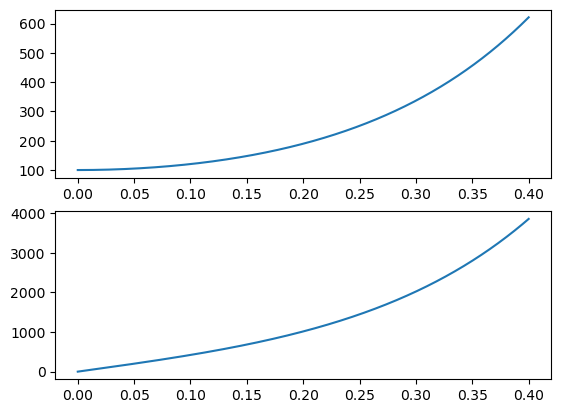

In [152]:
fig, ax = plt.subplots(2)
ax[0].plot(t,r)
ax[1].plot(t,vn)

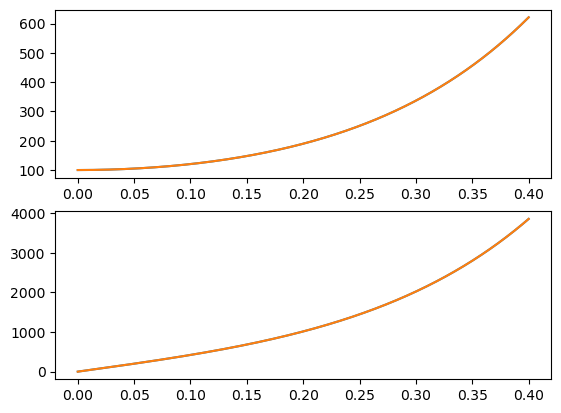

In [182]:
# r'' = w * r
# w = 2 pi 1/s
# r0 = 100
t = np.linspace(0,0.4,10000)
r = 50*exp(2*pi*t)+50*exp(-2*pi*t)
#r = r[r<= 378]
#t = t[0:len(r)]
vn = 2*pi*50*exp(2*pi*t)-2*pi*50*exp(-2*pi*t)


def simple_system(t, y):
    r, vn = y

    drdt = vn
    dvndt = ((2*pi)**2)*r

    return [drdt, dvndt]


simple_sol = solve_ivp(simple_system, (0, 0.4), [100, 0], t_eval=t, method="DOP853", rtol=1e-8, atol=1e-10)



fig, ax = plt.subplots(2)
ax[0].plot(simple_sol.t,simple_sol.y[0])
ax[0].plot(t, r)
ax[1].plot(simple_sol.t,simple_sol.y[1])
ax[1].plot(t, vn)

In [178]:
print("Number of integration steps taken:", len(simple_sol.t))


Number of integration steps taken: 10000


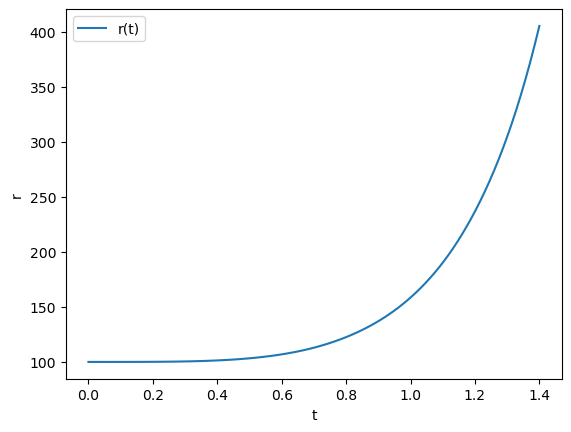

In [57]:
import numpy as np
from scipy.integrate import solve_ivp

# Define the system as first-order equations
def system(t, y):
    r, v = y  # r = y[0], v = y[1] (r' = v)
    drdt = v
    dvdt = 2 * np.pi * t**2 * r  # Given differential equation
    return [drdt, dvdt]

# Initial conditions
t_span = (0, 10)  # Interval for solution
y0 = [100, 0]  # Example: r(0) = 1, r'(0) = 0

# Solve numerically
sol = solve_ivp(system, t_span, y0, t_eval=np.linspace(0, 1.4, 100))

# Plot results
import matplotlib.pyplot as plt
plt.plot(sol.t, sol.y[0], label="r(t)")
plt.xlabel("t")
plt.ylabel("r")
plt.legend()
plt.show()


In [60]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of ODEs
def system(t, y):
    θ, v, r, u = y  # Unpacking variables

    # Compute d and phi
    d = np.sqrt((274 - 125*np.cos(θ))**2 + (-440 + 125*np.sin(θ))**2)
    phi = np.arctan((-440 + 125*np.sin(θ)) / (274 - 125*np.cos(θ)))

    # Compute derivatives
    dθdt = v
    dvdt = ((d - 280) * 3.23 * np.sin(θ - phi) - r * 0.5 * (dvdt * r + 2*v*u)) / 40000
    drdt = u
    dudt = v**2 * r

    return [dθdt, dvdt, drdt, dudt]

# Initial conditions
θ0, v0, r0, u0 = 0.1, 0, 280, 0  # Example values
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)

# Solve numerically
sol = solve_ivp(system, t_span, [θ0, v0, r0, u0], t_eval=t_eval)

# Plot results
plt.plot(sol.t, sol.y[0], label="θ(t)")
plt.plot(sol.t, sol.y[2], label="r(t)")
plt.xlabel("Time t")
plt.ylabel("Values")
plt.legend()
plt.show()


UnboundLocalError: cannot access local variable 'dvdt' where it is not associated with a value

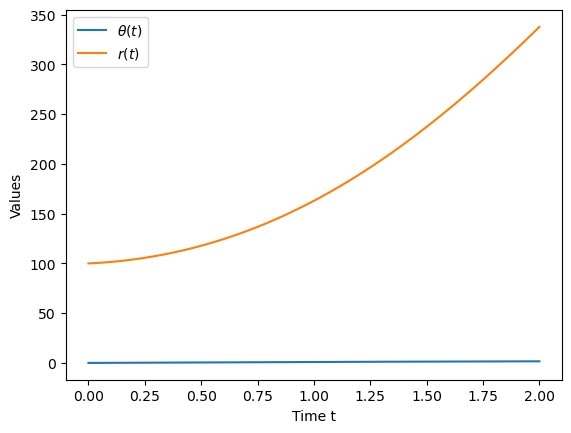

In [70]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of ODEs
def system(t, y):
    θ, v, r, u = y  # Unpacking variables

    # Compute d and phi
    d = np.sqrt((274 - 125 * np.cos(θ))**2 + (-440 + 125 * np.sin(θ))**2)
    phi = np.arctan2(-440 + 125 * np.sin(θ), 274 - 125 * np.cos(θ))  # Use arctan2 for better numerical stability

    # Compute dvdt properly
    numerator = (d - 280) * 3.23 * np.sin(θ - phi) - r * 0.5 * (2 * v * u)
    denominator = 40000 + 0.5 * r**2  # Prevent division issues
    dvdt = numerator / denominator

    # Other derivatives
    dθdt = v
    drdt = u
    dudt = v**2 * r

    return [dθdt, dvdt, drdt, dudt]

# Initial conditions
θ0, v0, r0, u0 = 0, 1, 100, 10  # Example values
t_span = (0, 2)
t_eval = np.linspace(0, 2, 10000)

# Solve numerically
sol = solve_ivp(system, t_span, [θ0, v0, r0, u0], t_eval=t_eval)

# Plot results
plt.plot(sol.t, sol.y[0], label=r"$\theta(t)$")
plt.plot(sol.t, sol.y[2], label=r"$r(t)$")
plt.xlabel("Time t")
plt.ylabel("Values")
plt.legend()
plt.show()


In [313]:
import numpy as np
from scipy.integrate import solve_ivp

def system(t, y):
    theta, theta_dot, r, r_dot = y
    
    # Compute the auxiliary expression A
    # Use arctan2 for correct quadrant handling.
    numerator = -0.440 + 0.125 * np.sin(theta)
    denominator = 0.274 - 0.125 * np.cos(theta)
    angle = np.arctan2(numerator, denominator)
    
    A = (np.sqrt((denominator)**2 + (numerator)**2) - 0.280) * 3230 * np.sin(theta - angle)
    
    # Compute theta'' from rearranged equation
    theta_ddot = (A - r * theta_dot * r_dot) / (0.04 + 0.145 * r**2)
    
    # Equation 2: r'' = theta_dot^2 * r
    r_ddot = theta_dot**2 * r
    
    return [theta_dot, theta_ddot, r_dot, r_ddot]


def event_r_0378(t, y):
    return y[2] - 0.378  # Event when r = 378

event_r_0378.terminal = True  # Stop integration when event is detected
event_r_0378.direction = 1    # Only trigger when r is increasing

# Define initial conditions: [theta, theta_dot, r, r_dot]
y0 = [0.0, 0.0, 0.1, 0.0]  # Replace with your actual initial values

# Define the time span for the integration
t_span = (0, 2)  # Adjust the final time as needed
t_eval = np.linspace(t_span[0], t_span[1], 100000)
# Solve the ODE system with the event
sol = solve_ivp(system, t_span, y0, events=event_r_0378,t_eval=t_eval, dense_output=True)

# Check if the event was triggered
if sol.t_events[0].size > 0:
    t_release = sol.t_events[0][0]
    print(f"t_release when r = 378: {t_release:.4f} seconds")
else:
    print("The event r = 378 mm was not reached within the time span.")



theta, theta_dot, r, r_dot = sol.y

v_tangential = theta_dot*r
v_abs = np.sqrt(v_tangential**2+r_dot**2)
v_direction_on_AB = np.arctan2(v_tangential, r_dot)
v_direction_on_CD = v_direction_on_AB + theta

t_release when r = 378: 0.0223 seconds


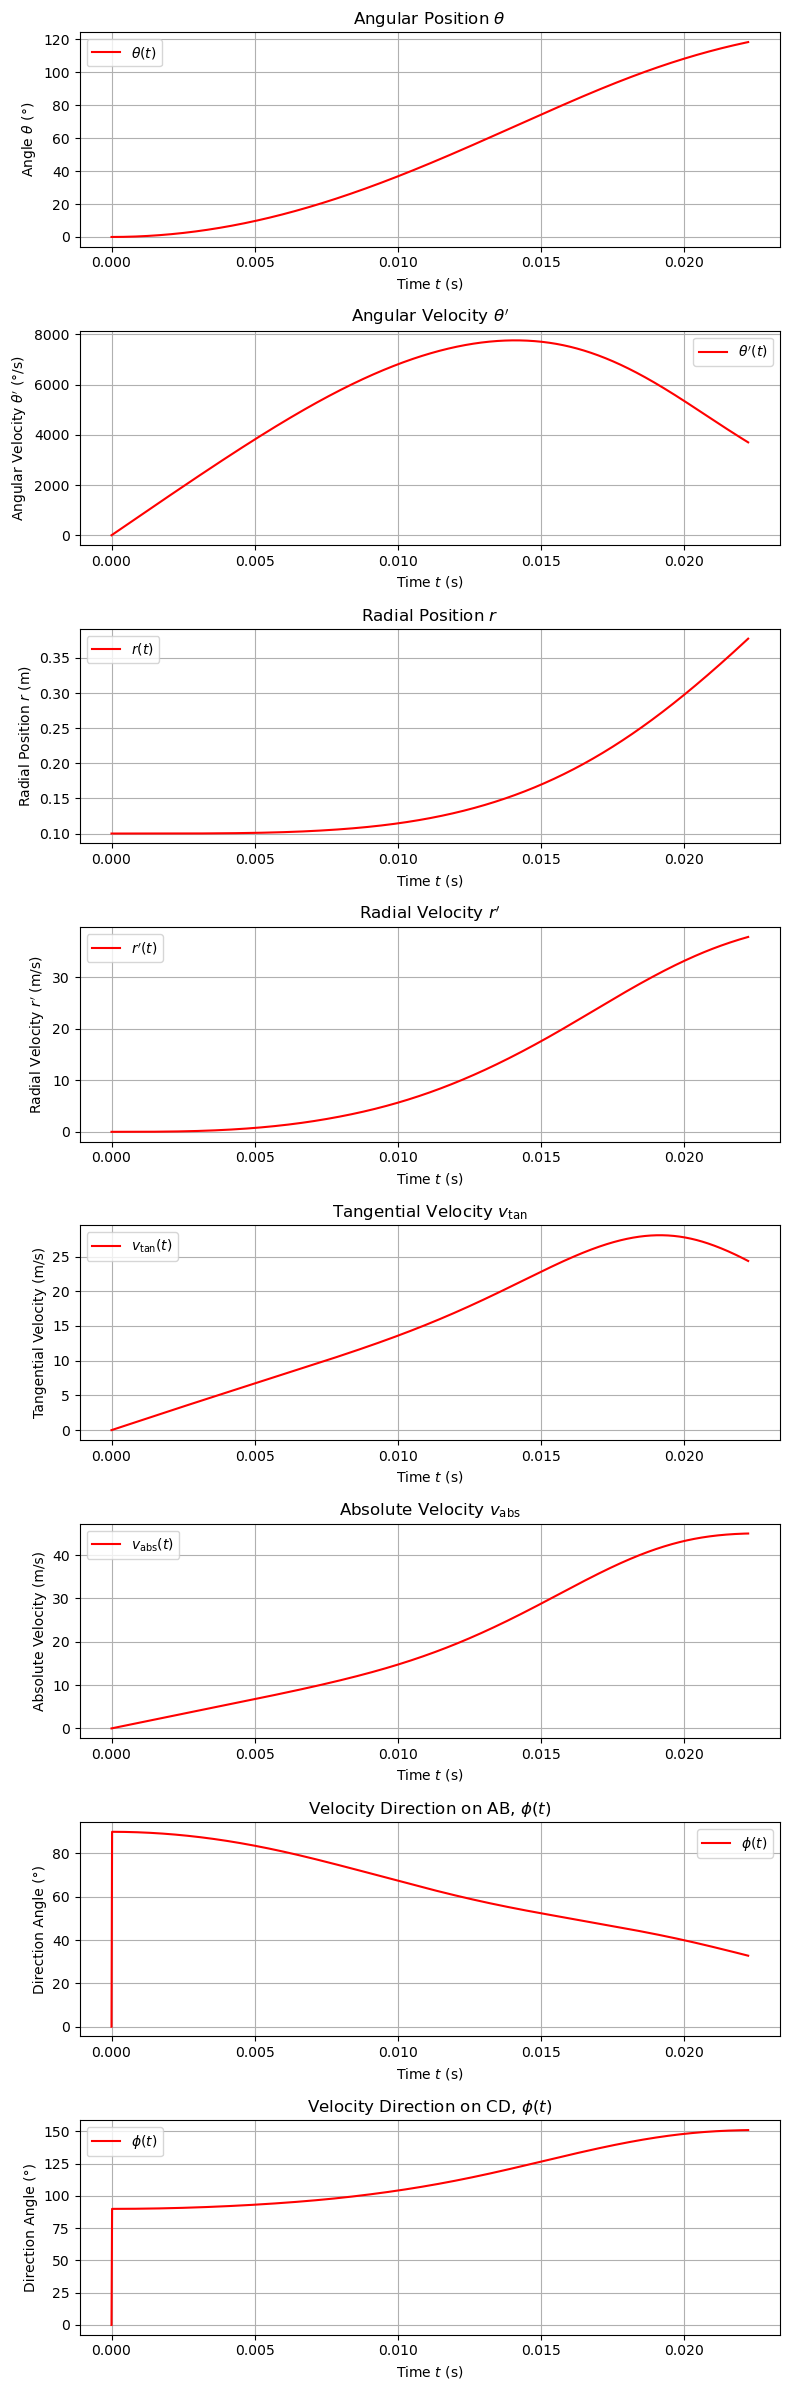

In [315]:


import numpy as np
import matplotlib.pyplot as plt

# Assuming that you have already computed the following using solve_ivp:
# sol.t, sol.y and the derived quantities: v_tangential, v_abs, and v_direction_on_CD

fig, ax = plt.subplots(8, figsize=(8, 24))

# Plot θ (angular position)
ax[0].plot(sol.t, np.rad2deg(sol.y[0]), label=r"$\theta(t)$", color='red')
ax[0].set_xlabel(r"Time $t$ (s)")
ax[0].set_ylabel(r"Angle $\theta$ (°)")
ax[0].set_title(r"Angular Position $\theta$")
ax[0].legend()
ax[0].grid(True)

# Plot θ' (angular velocity)
ax[1].plot(sol.t, np.rad2deg(sol.y[1]), label=r"$\theta'(t)$", color='red')
ax[1].set_xlabel(r"Time $t$ (s)")
ax[1].set_ylabel(r"Angular Velocity $\theta'$ (°/s)")
ax[1].set_title(r"Angular Velocity $\theta'$")
ax[1].legend()
ax[1].grid(True)

# Plot r (radial position)
ax[2].plot(sol.t, sol.y[2], label=r"$r(t)$", color='red')
ax[2].set_xlabel(r"Time $t$ (s)")
ax[2].set_ylabel(r"Radial Position $r$ (m)")
ax[2].set_title(r"Radial Position $r$")
ax[2].legend()
ax[2].grid(True)

# Plot r' (radial velocity)
ax[3].plot(sol.t, sol.y[3], label=r"$r'(t)$", color='red')
ax[3].set_xlabel(r"Time $t$ (s)")
ax[3].set_ylabel(r"Radial Velocity $r'$ (m/s)")
ax[3].set_title(r"Radial Velocity $r'$")
ax[3].legend()
ax[3].grid(True)

# Plot tangential velocity: v_tangential = theta_dot * r
ax[4].plot(sol.t, v_tangential, label=r"$v_{\mathrm{tan}}(t)$", color='red')
ax[4].set_xlabel(r"Time $t$ (s)")
ax[4].set_ylabel(r"Tangential Velocity (m/s)")
ax[4].set_title(r"Tangential Velocity $v_{\mathrm{tan}}$")
ax[4].legend()
ax[4].grid(True)

# Plot absolute velocity: v_abs = sqrt(v_tan^2 + r_dot^2)
ax[5].plot(sol.t, v_abs, label=r"$v_{\mathrm{abs}}(t)$", color='red')
ax[5].set_xlabel(r"Time $t$ (s)")
ax[5].set_ylabel(r"Absolute Velocity (m/s)")
ax[5].set_title(r"Absolute Velocity $v_{\mathrm{abs}}$")
ax[5].legend()
ax[5].grid(True)

# Plot velocity direction on CD: v_direction_on_CD in degrees
ax[6].plot(sol.t, np.rad2deg(v_direction_on_AB), label=r"$\phi(t)$", color='red')
ax[6].set_xlabel(r"Time $t$ (s)")
ax[6].set_ylabel(r"Direction Angle (°)")
ax[6].set_title(r"Velocity Direction on AB, $\phi(t)$")
ax[6].legend()
ax[6].grid(True)

# Plot velocity direction on CD: v_direction_on_CD in degrees
ax[7].plot(sol.t, np.rad2deg(v_direction_on_CD), label=r"$\phi(t)$", color='red')
ax[7].set_xlabel(r"Time $t$ (s)")
ax[7].set_ylabel(r"Direction Angle (°)")
ax[7].set_title(r"Velocity Direction on CD, $\phi(t)$")
ax[7].legend()
ax[7].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
